# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Ezraliano Sachio Krisnadiva
- Email: krisnadiva456@gmail.com
- Id Dicoding: krisna_diva_XZ7R

## Persiapan

### Menyiapkan library yang dibutuhkan

In [76]:
!pip install streamlit

Deskripsi :
Menginstall stremlit

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import streamlit as st

Deskripsi :
Mengimport Library yang digunakan untuk manipulasi data (pandas, numpy), visualisasi (matplotlib, seaborn), preprocessing dan pemodelan (scikit-learn), penanganan data tidak seimbang (imblearn), penyimpanan model (joblib), dan antarmuka pengguna (streamlit).

### Menyiapkan data yang akan diguankan

## Data Understanding

In [78]:
# 1. Load Dataset
data = pd.read_csv('https://raw.githubusercontent.com/Ezraliano/submission_akhir_data_science_final1/refs/heads/main/data.csv')
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Deskripsi :
Melakukan load dataset

## EDA (Univariate Analysis)

In [79]:
# Set style untuk visualisasi agar lebih rapi
sns.set(style="whitegrid")
plt.style.use("ggplot")

Deskripsi :    
Menambahkan whitegrid agar visualisasi terlihat jelas dan rapi

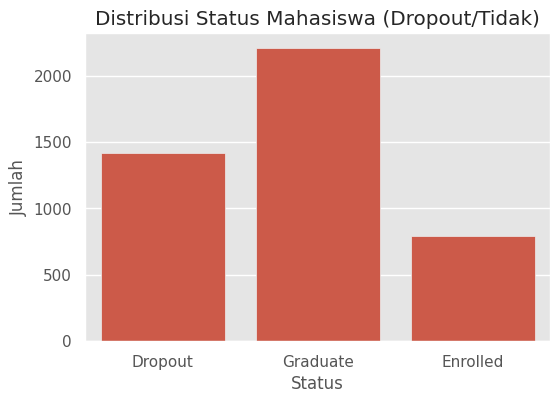

In [80]:
# Distribusi Variabel Target (Status)
plt.figure(figsize=(6,4))
sns.countplot(x='Status', data=data)
plt.title('Distribusi Status Mahasiswa (Dropout/Tidak)')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

Deskripsi :
Menggunakan countplot untuk melihat distribusi variabel target (Status), misalnya jumlah mahasiswa yang lulus vs. dropout.

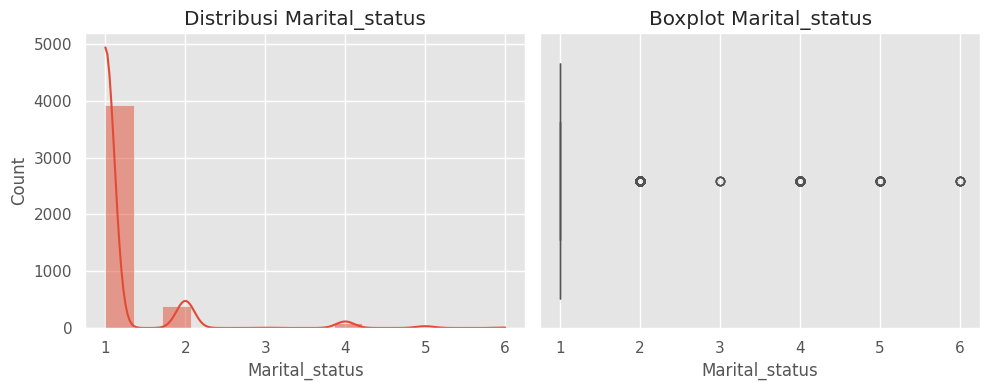

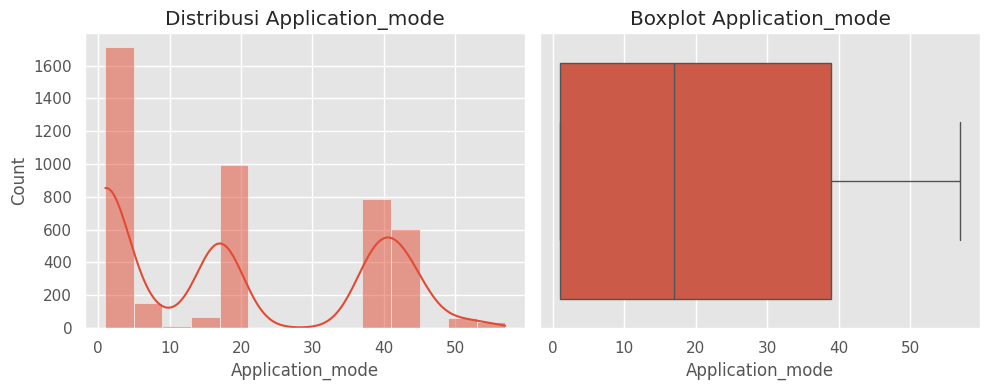

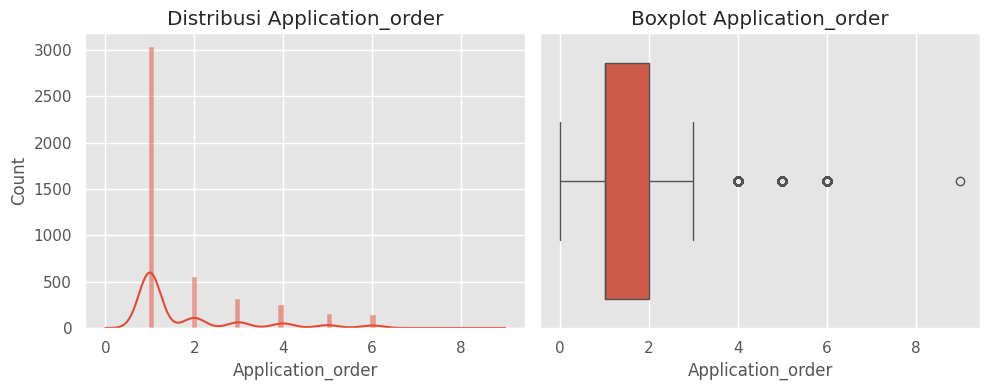

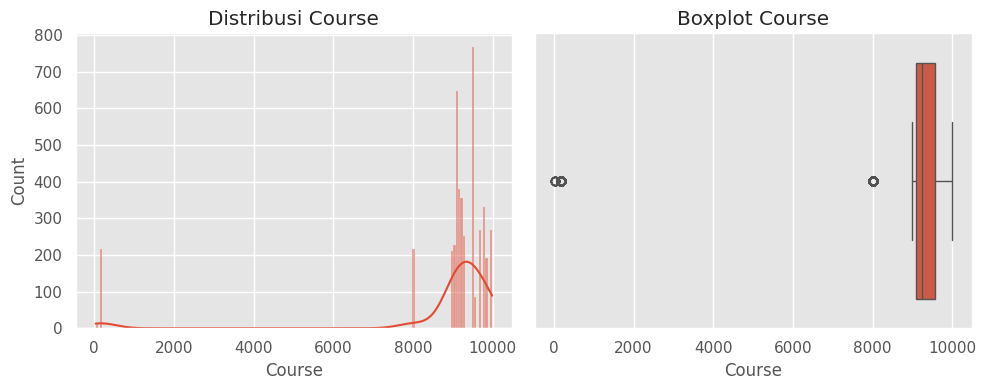

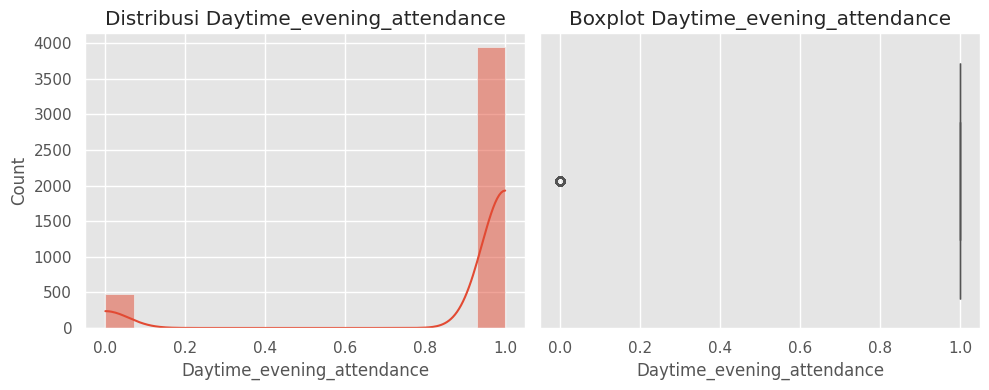

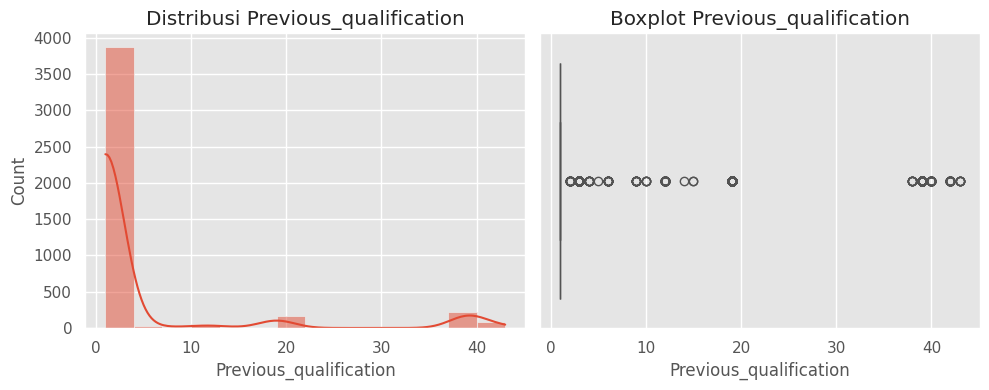

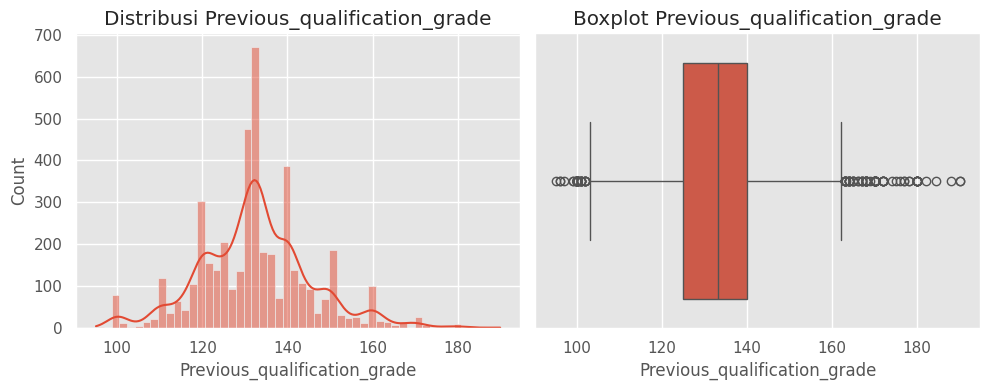

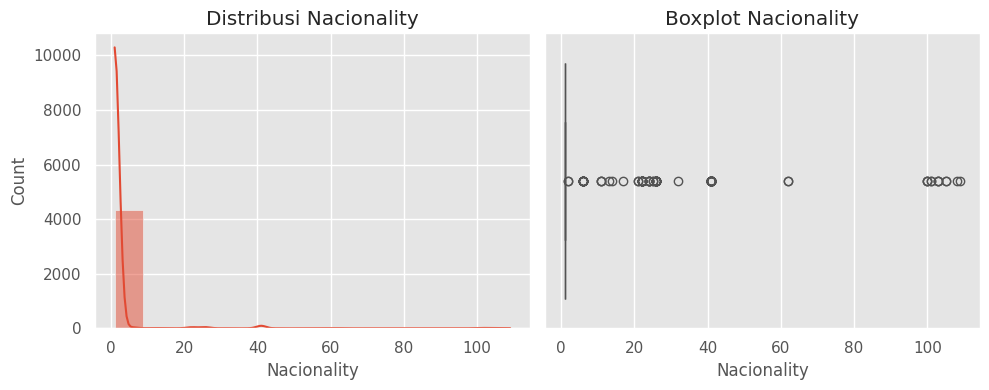

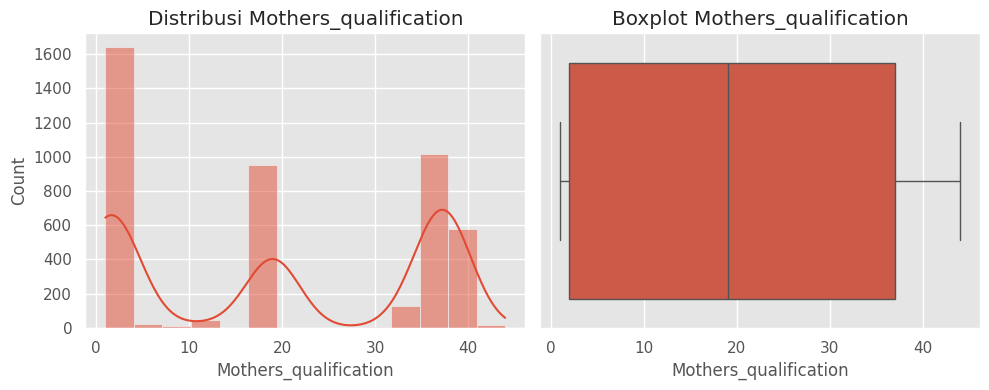

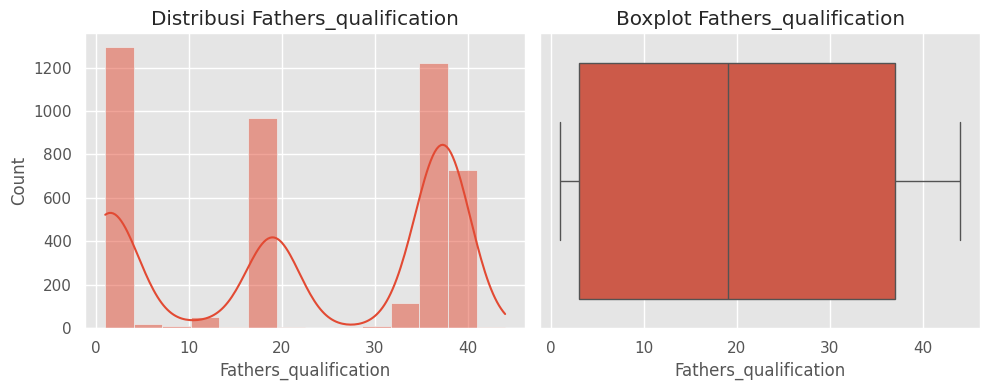

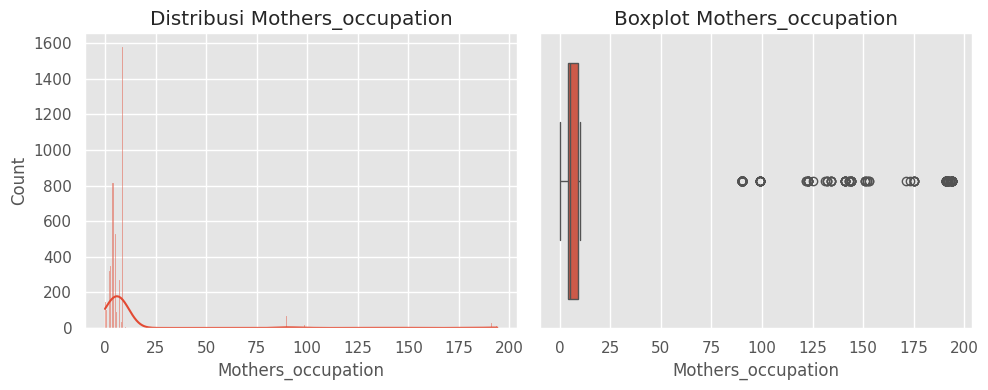

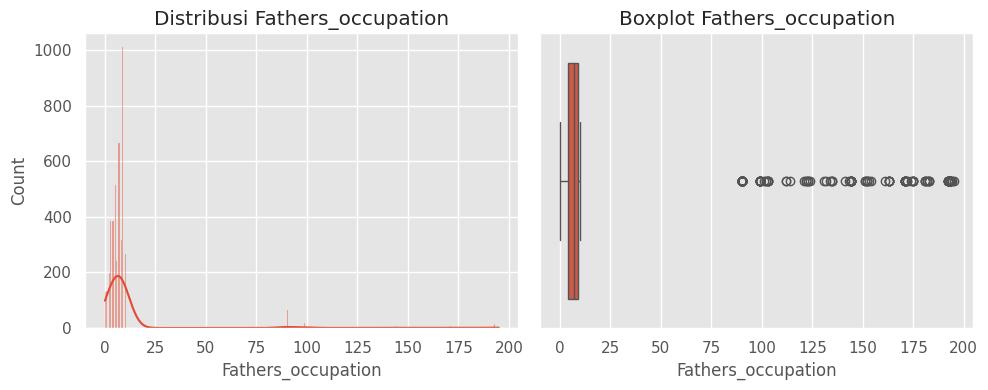

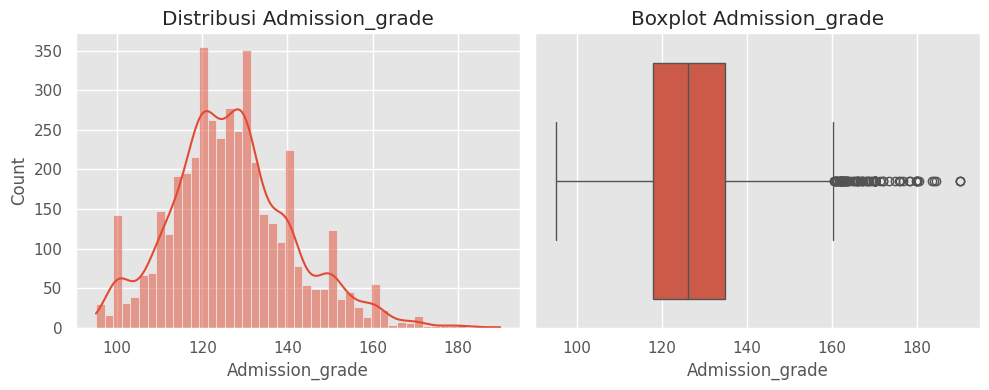

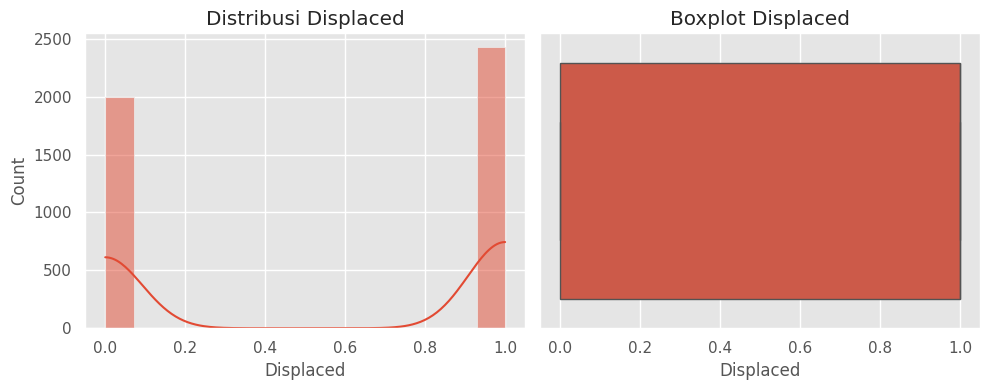

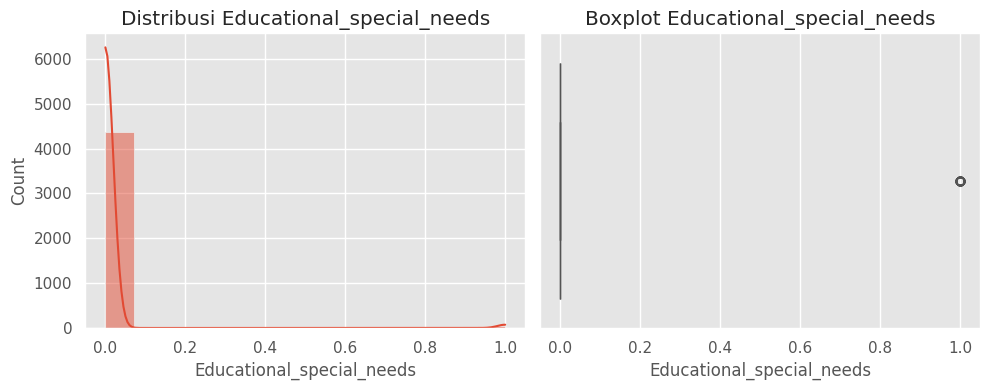

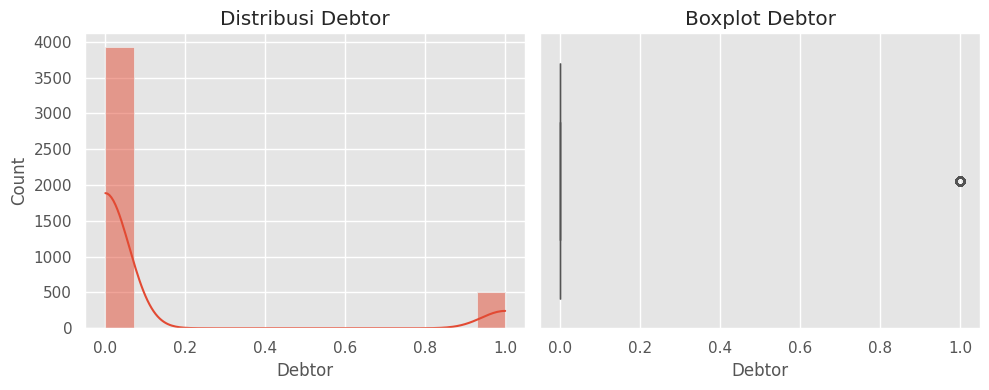

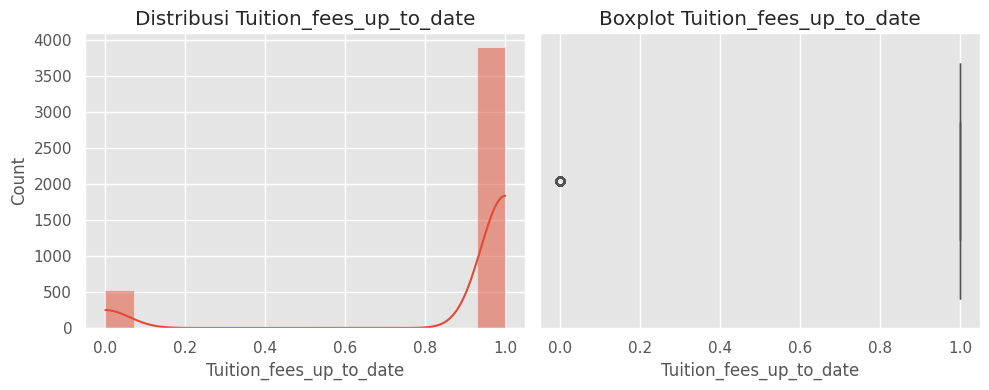

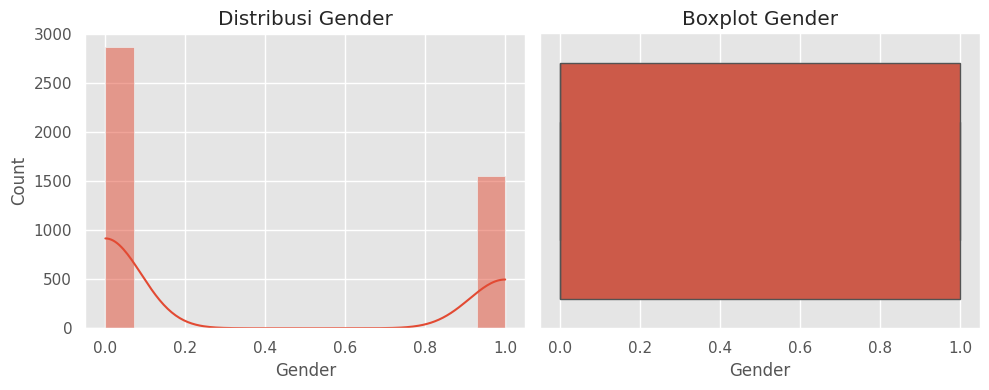

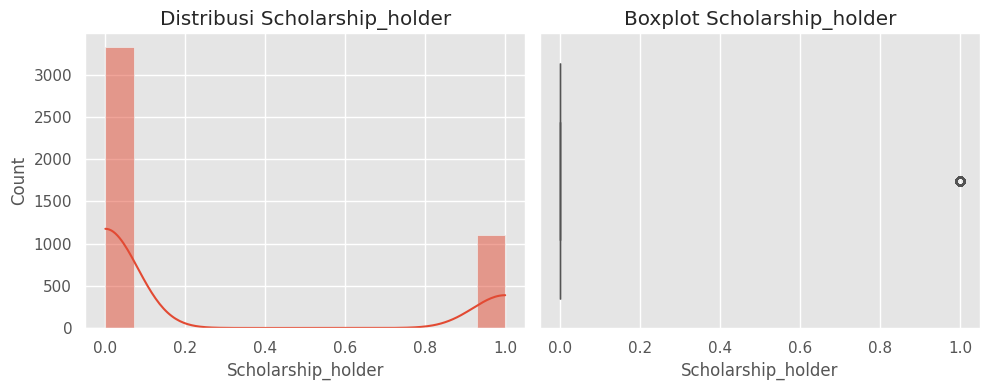

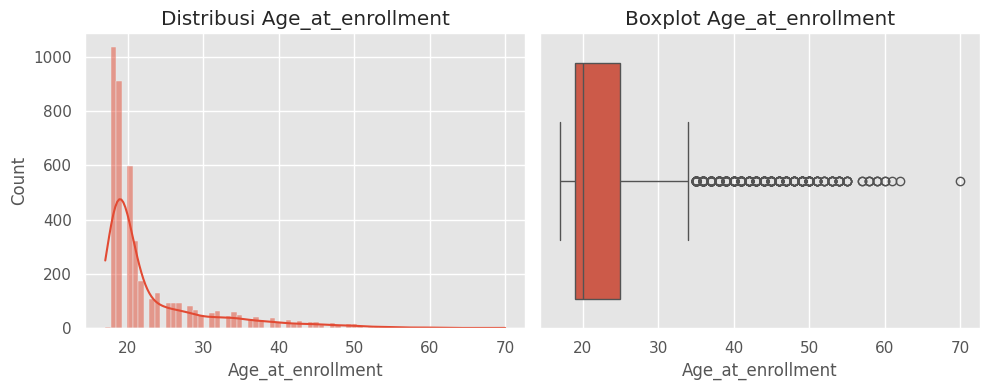

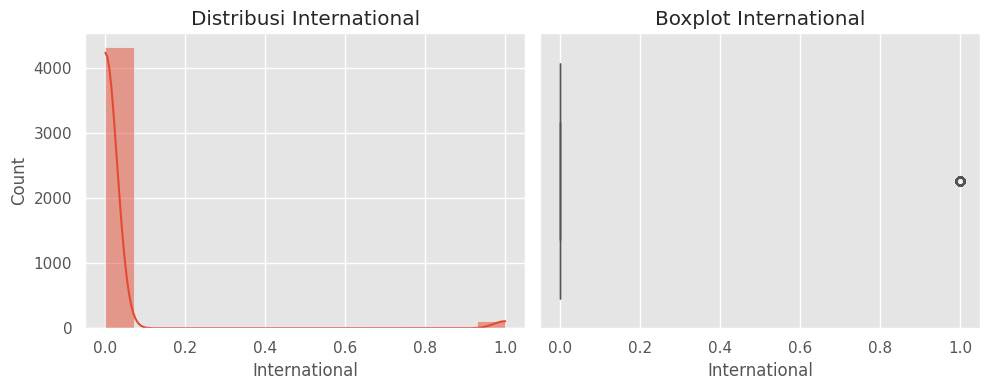

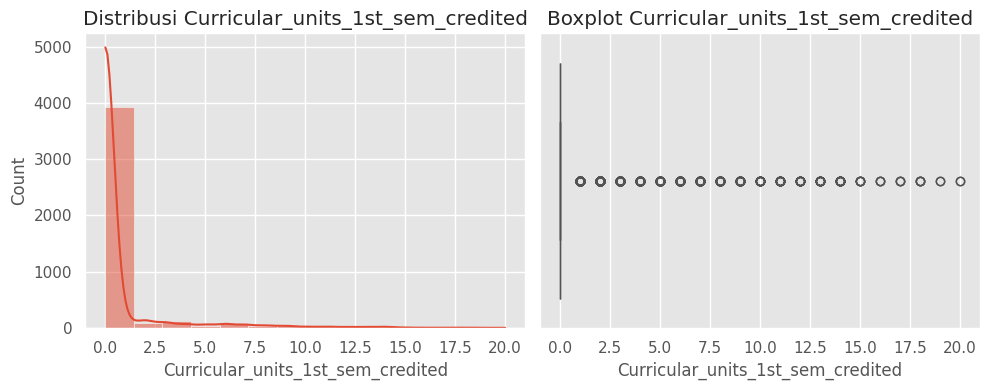

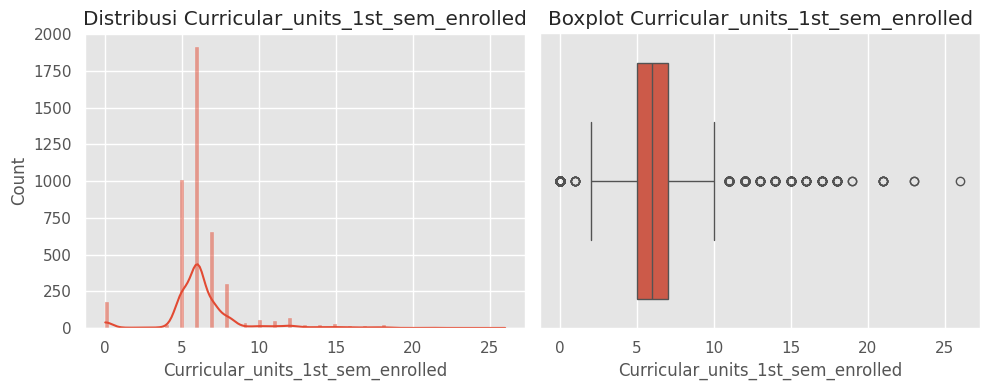

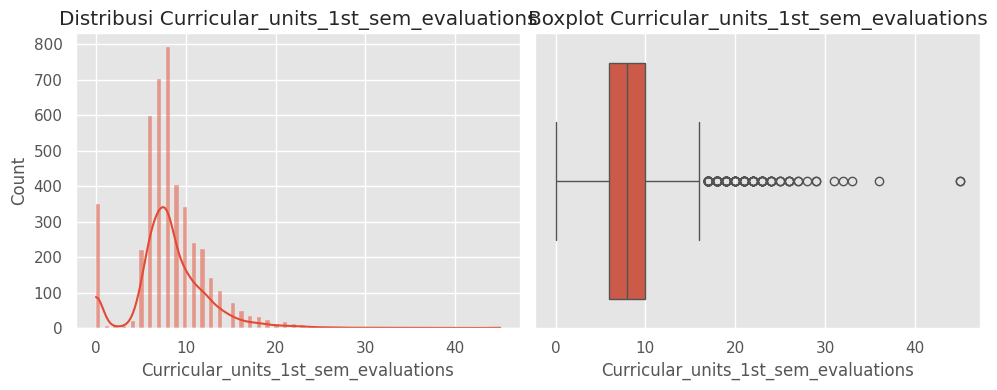

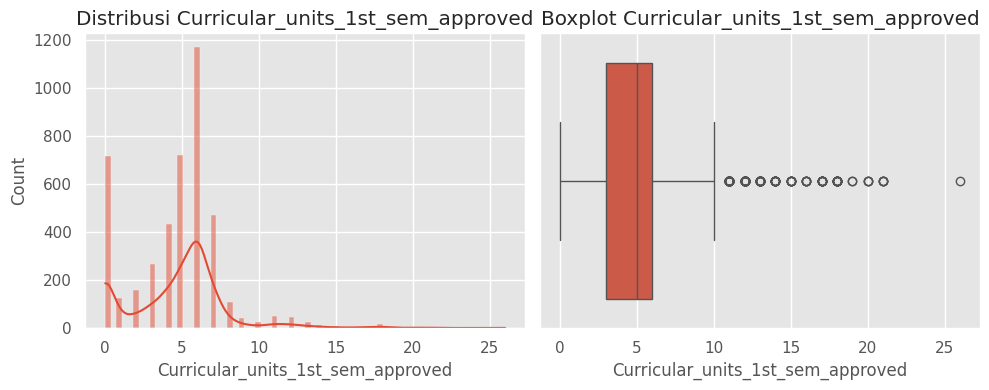

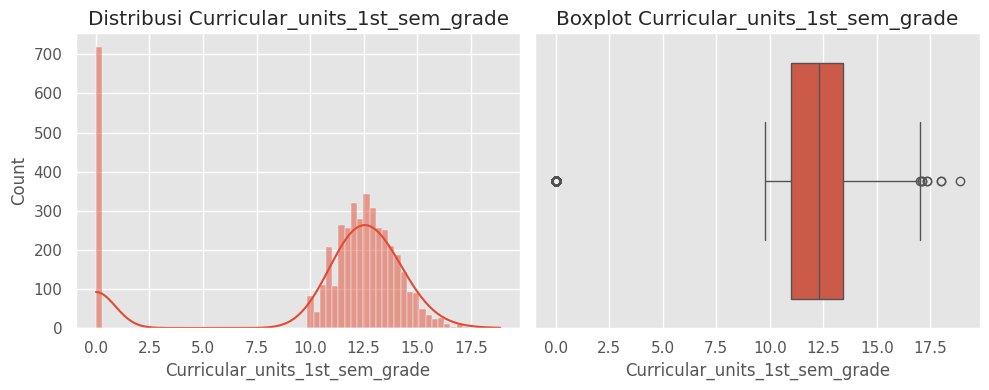

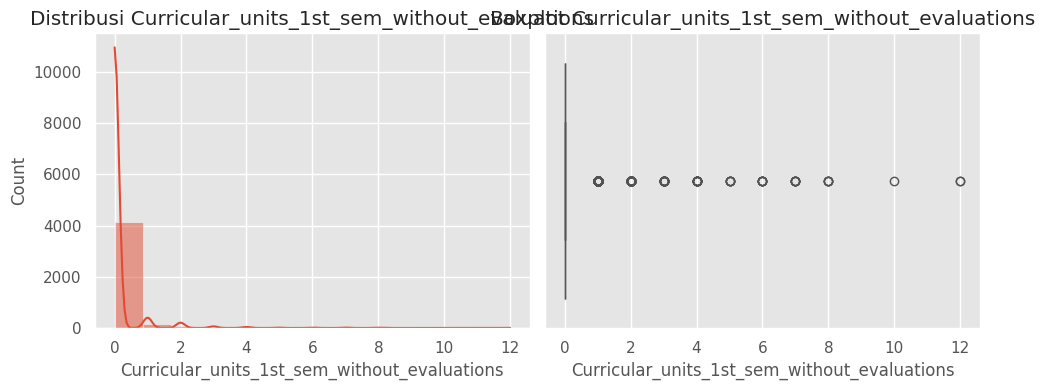

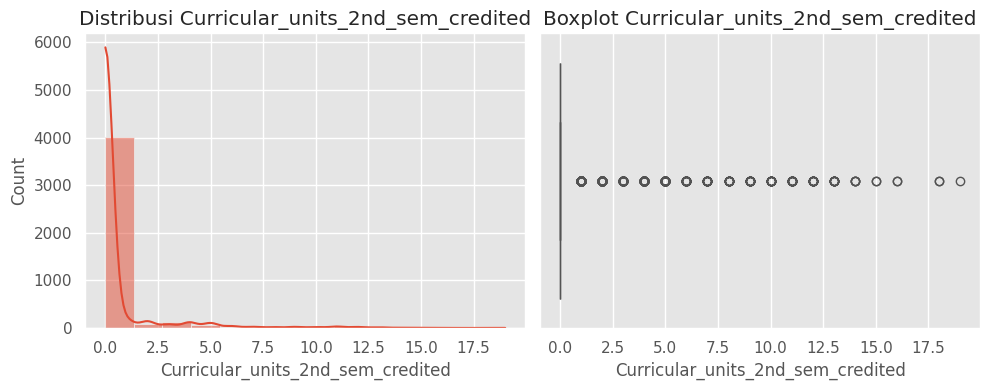

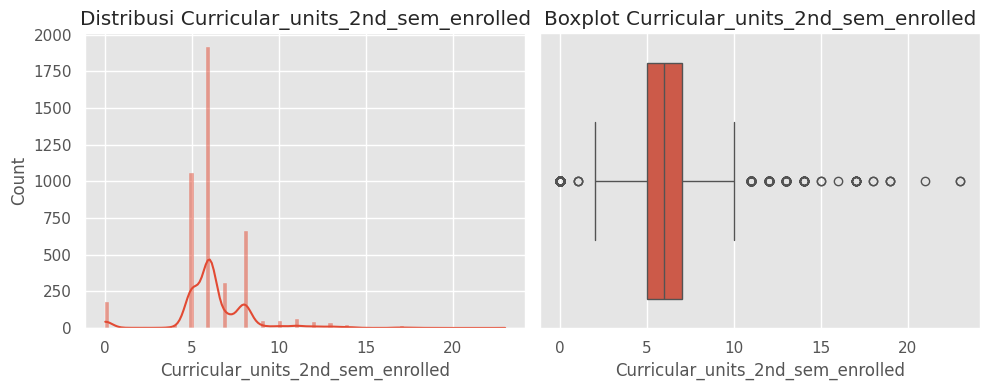

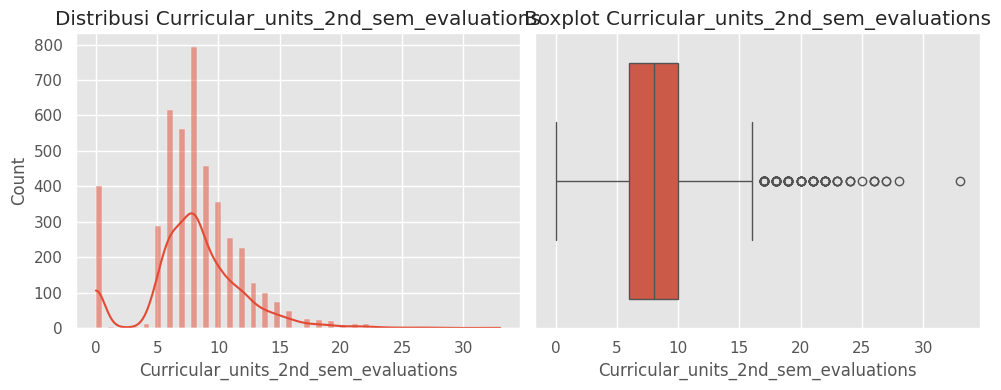

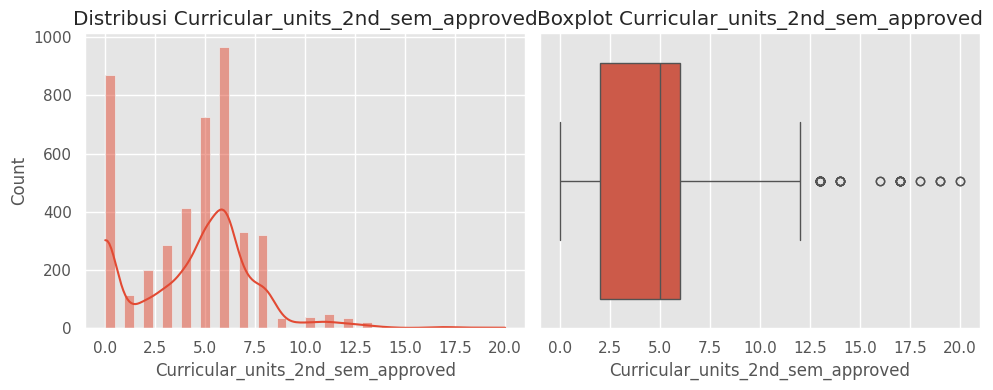

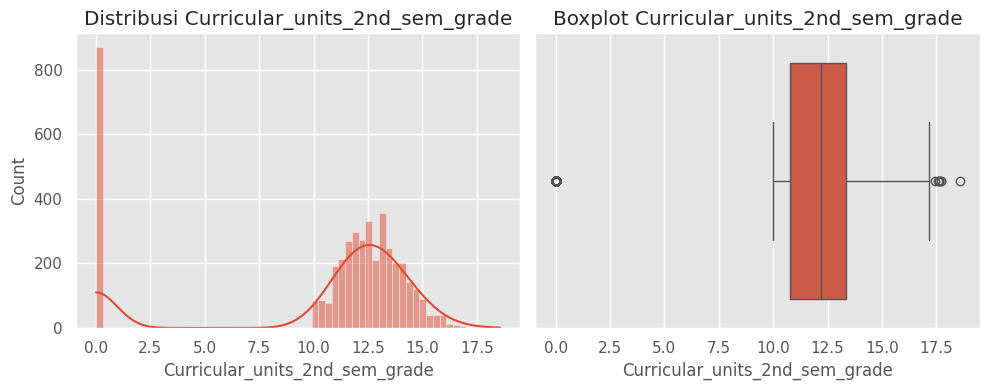

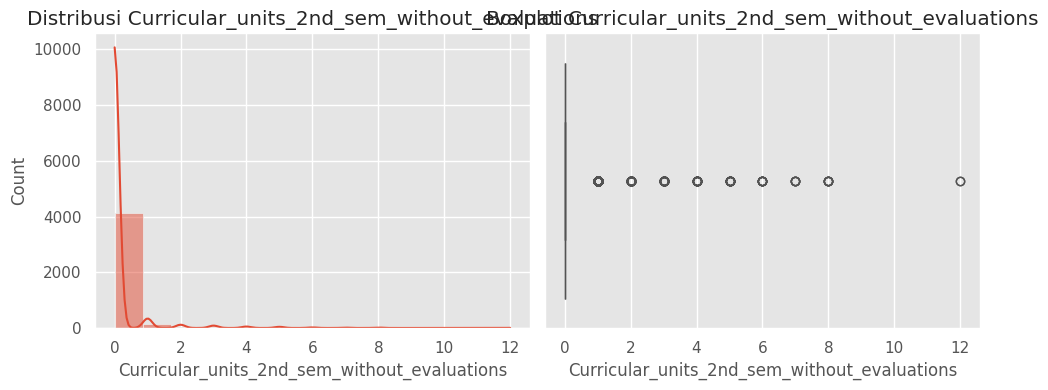

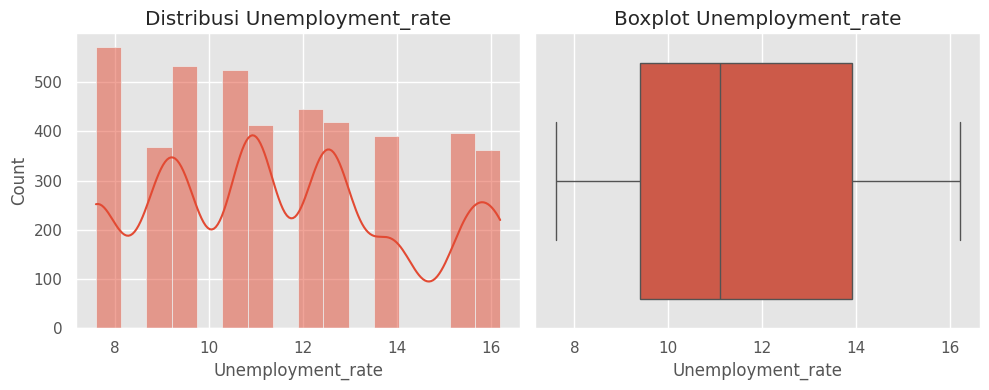

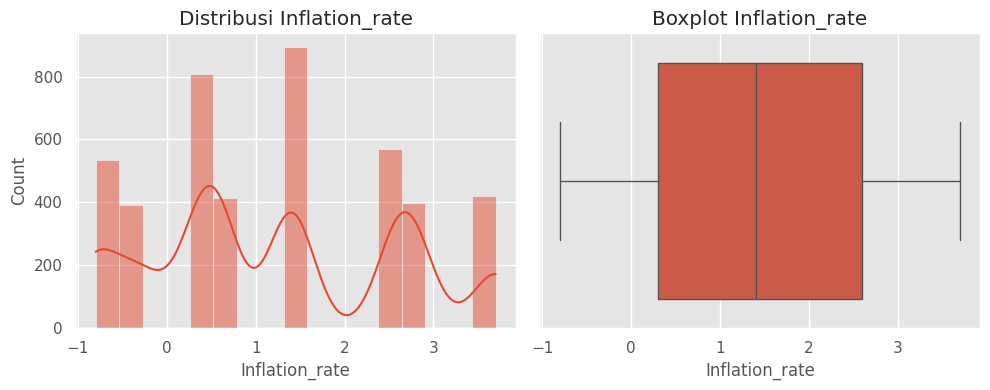

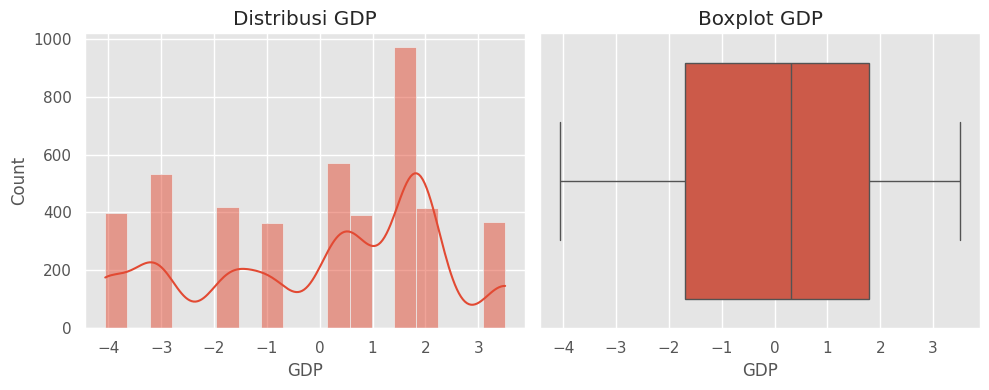

In [81]:
#  Distribusi Variabel Numerik
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(10,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribusi {col}')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot {col}')

    plt.tight_layout()
    plt.show()

Deskripsi :
Melakukan visualisasi untuk melihat distribusi data variabel numerik. Visualisasi menggunakan histogram dan boxplot.

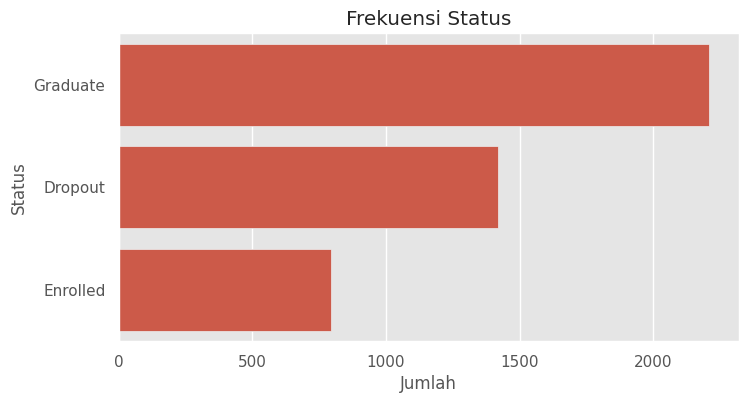

In [82]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Frekuensi {col}')
    plt.xlabel('Jumlah')
    plt.ylabel(col)
    plt.show()

Deskripsi :
Melakukan visualisasi untuk melihat distribusi data variabel kategorikal. Visualisasi menggunakan bar chart

## Data Preparation / Preprocessing

In [83]:
# 4. Data Preprocessing
# Pisahkan fitur dan target
X = data.drop('Status', axis=1)
y = data['Status']

Deskripsi : Melakukan split data yang dimana Fitur (X): Semua kolom kecuali Status dan Target (y): Kolom Status.

In [84]:
# Identifikasi kolom kategorikal dan numerik
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

Deskripsi : Melakukan identifikasi Kolom kategorikal: Kolom dengan tipe data object dan Kolom numerik: Kolom dengan tipe data int64 atau float64

In [85]:
# Buat pipeline preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

Deskripsi : Menggunakan ColumnTransformer untuk menerapkan StandardScaler (menskalakan fitur numerik) dan OneHotEncoder (mengkodekan fitur kategorikal, menghapus satu kategori untuk menghindari multicollinearity).

In [86]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Deskripsi : Data dibagi menjadi 80% training (X_train, y_train) dan 20% testing (X_test, y_test) dengan random_state=42 untuk reproduktibilitas

## Modeling

In [87]:
# 5. Modeling
# Buat pipeline dengan preprocessing, SMOTE, dan Random Forest
model_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

Deskripsi : Menggunakan ImbPipeline dari imblearn untuk menggabungkan preprocessing, oversampling, dan klasifikasi.

In [88]:
# Latih model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       '...
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index([], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

Deskripsi : Proses melatih model

## Evaluation

In [89]:
# 6. Evaluation
# Prediksi pada data testing
y_pred = model_pipeline.predict(X_test)

In [90]:
# Cetak laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.87      0.75      0.80       316
    Enrolled       0.47      0.46      0.46       151
    Graduate       0.80      0.89      0.85       418

    accuracy                           0.77       885
   macro avg       0.71      0.70      0.71       885
weighted avg       0.77      0.77      0.77       885



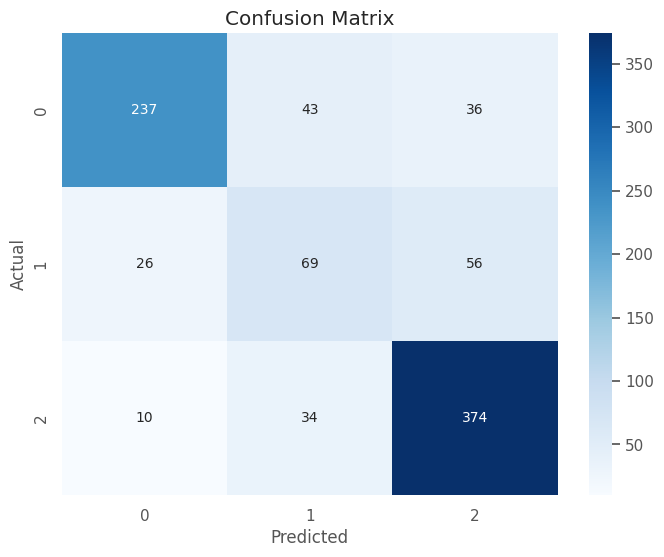

In [91]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Deskripsi : Membuat barplot untuk 15 fitur terpenting.

In [92]:
# Feature Importance
# Dapatkan nama fitur setelah preprocessing
feature_names = numerical_cols.tolist()
if len(categorical_cols) > 0:
    feature_names += (model_pipeline.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .get_feature_names_out(categorical_cols).tolist())

Deskripsi : Mengambil nilai pentingnya fitur dari model Random Forest (feature_importances_).

In [93]:
# Dapatkan feature importances
importances = model_pipeline.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df.head(10))

Feature Importance:
                                  Feature  Importance
30     Curricular_units_2nd_sem_approved    0.133490
31        Curricular_units_2nd_sem_grade    0.093414
24     Curricular_units_1st_sem_approved    0.089728
25        Curricular_units_1st_sem_grade    0.055866
29  Curricular_units_2nd_sem_evaluations    0.054573
23  Curricular_units_1st_sem_evaluations    0.042911
16               Tuition_fees_up_to_date    0.039973
19                     Age_at_enrollment    0.038143
12                       Admission_grade    0.034179
28     Curricular_units_2nd_sem_enrolled    0.032304


Deskripsi : Membuat DataFrame untuk menyimpan nama fitur dan nilai kepentingannya, diurutkan dari yang terbesar

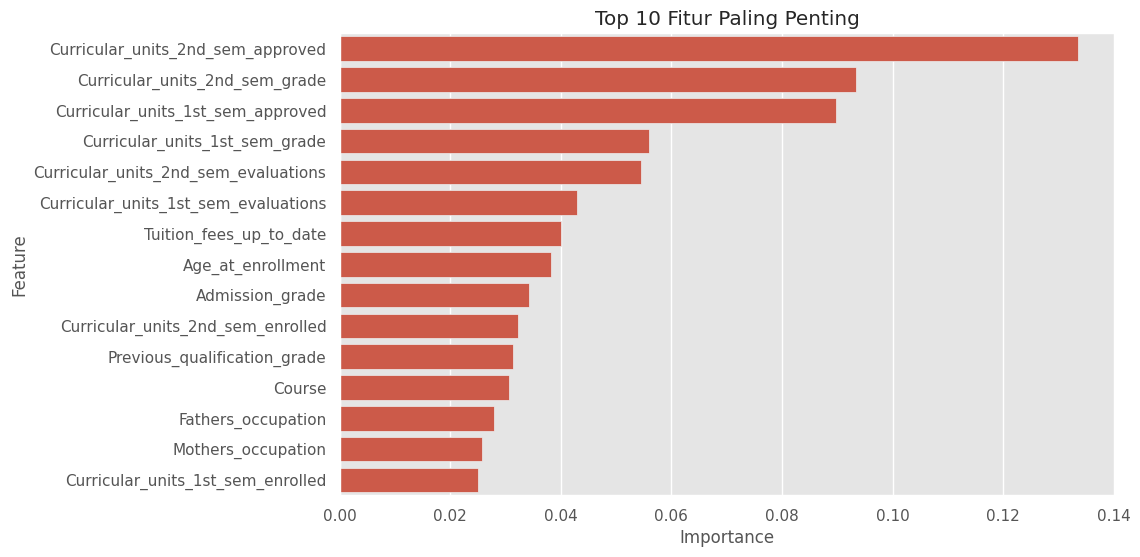

In [94]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 10 Fitur Paling Penting')
plt.show()

Deskripsi : Menampilkan 10 fitur teratas.

In [95]:
# Bagian Streamlit
st.title("Prediksi Status Dropout Mahasiswa")
st.write("Silakan masukkan data mahasiswa di bawah ini:")

2025-05-10 10:56:21.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.769 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Deskripsi : Menggunakan streamlit untuk membuat aplikasi web interaktif

In [96]:
# Ambil kolom-kolom input dari data
user_input = {}
for col in X.columns:
    if col in categorical_cols:
        options = data[col].unique().tolist()
        user_input[col] = st.selectbox(f"{col}", options)
    else:
        user_input[col] = st.number_input(f"{col}", float(data[col].min()), float(data[col].max()))

2025-05-10 10:56:21.780 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.781 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.784 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.785 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.789 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.790 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Deskripsi : Untuk kolom kategorikal: Menampilkan dropdown (selectbox) dengan nilai unik dari dataset. Untuk kolom numerik: Menampilkan input numerik (number_input) dengan batas minimum dan maksimum dari dataset

In [97]:
# Jika tombol ditekan
if st.button("Prediksi"):
    # Buat dataframe dari input
    input_df = pd.DataFrame([user_input])

    # Lakukan prediksi
    prediction = model_pipeline.predict(input_df)[0]

    # Tampilkan hasil
    st.success(f"Status Mahasiswa yang Diprediksi: **{prediction}**")

2025-05-10 10:56:21.983 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.985 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.985 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.986 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:56:21.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Deskripsi : Ketika tombol "Prediksi" ditekan, input pengguna diubah menjadi DataFrame. Model memprediksi status berdasarkan input dan menampilkan hasilnya (misalnya, "Dropout" atau "Graduate").